0.0

In [ ]:
import pandas as pd
import gzip
import sys, os
import numpy as np
from tqdm.notebook import tqdm
from emoji import UNICODE_EMOJI, demojize
import seaborn as sns
import warnings
import ast
warnings.filterwarnings('ignore')

%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
sys.path.insert(0, os.path.abspath('..'))

from src.data import make_dataset, preprocessor

ModuleNotFoundError: ignored

In [ ]:
final_df=pd.read_csv(r'twitter.csv')
df = final_df[final_df['language']=='en']
ru_df = final_df[final_df['language']=='ru']
del final_df

[Text(0.5, 1.0, 'Top 20 Most Used Emojis')]

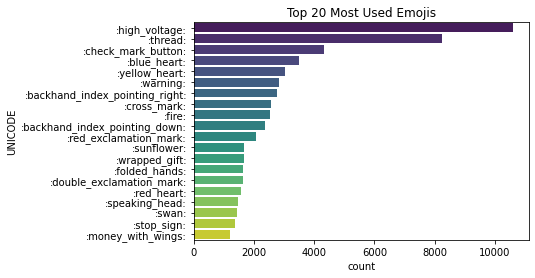

In [ ]:
emojis_df = make_dataset.get_all_emoji(df, 'en')   
sns.barplot(y="UNICODE", x="count", data=emojis_df.head(20), palette='viridis').set(title='Top 20 Most Used Emojis')

In [ ]:
preprocessor.clean_hashtag(df)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[russianinvasion, standwithukraine️, ukraineun...",en,NaN,0,2022-04-01 00:09:37.148770
2,2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,[russianukrainianwar],en,NaN,0,2022-04-01 00:09:37.125654
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,[anonymous],en,NaN,0,2022-04-01 00:31:39.674382
4,4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364866,364866,18006752,KatCapps,#Liberal #Progressive RT≠endorse Likes=BM #Ant...,Western States Pact,43313,42652,893115,2008-12-09 23:58:21.000000,1510044325656219652,2022-04-01 23:59:57.000000,1333,14-year-old Yura from #Bucha told how a Russia...,[bucha],en,NaN,0,2022-04-02 00:13:16.271866
364869,364869,1498731629426225154,knut_konig,NaN,NaN,5,8,746,2022-03-01 18:47:55.000000,1510044327426281475,2022-04-01 23:59:57.000000,0,#RussianUkrainianWar #UkraineRussianWar #Russi...,"[russianukrainianwar, ukrainerussianwar, russi...",en,NaN,0,2022-04-02 00:34:39.574787
364871,364871,1054170412194553857,TribalHawk1,NaN,East Los Angeles,207,29,9045,2018-10-22 00:39:46.000000,1510044329993138176,2022-04-01 23:59:58.000000,0,“From where Winston stood it was just possible...,[ukraine],en,NaN,0,2022-04-02 00:13:16.239719
364872,364872,40997579,ljall00,Democrat. This is a country of laws for everyo...,"Scottsdale, AZ",5336,4898,162426,2009-05-18 23:21:35.000000,1510044330085347328,2022-04-01 23:59:58.000000,2264,When I said tonight in front of 3000 people In...,[],en,NaN,0,2022-04-02 00:46:46.527353


[Text(0.5, 1.0, 'Top 20 Most Used Hashtags')]

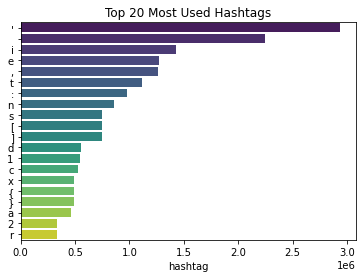

In [ ]:
counts = make_dataset.count_hashtags(df)
sns.barplot(y=counts.head(20).index, x="hashtag", data=counts.head(20), palette='viridis').set(title='Top 20 Most Used Hashtags')

# 1.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,HashingVectorizer

In [ ]:
## Reading the data and removing columns that are not important. 
df = pd.read_csv('twitter.csv', sep = ',', encoding = 'latin-1')
df.head(5)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,â¡The Ukrainian Air Force would like to addre...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,2,1235940869812809728,ThanapornThon17,à¹à¸¥à¹à¸à¹à¸§à¹à¸­à¸¥à¸´à¸\nà¸à¸¹à¸à¸...,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America ðºð¸ is preparing for something wo...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,4,1505394816636846083,Marsh_Win_01,ð¿@Pickaw @TWITTERPICKER ð¿Winning isnât...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459


In [ ]:
#Remove the data that the text language is not English
df = df.drop(df[df['language']!="en"].index)
#Test on the first 10000 rows
df = df.loc[1:10000]

In [ ]:
import re
from bs4 import BeautifulSoup
from html import unescape
#Remove URLS
def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [ ]:
#Unescape characters
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [ ]:
#Remove emojis
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
#Replace conservative whitespaces
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [ ]:
#Remove unwanted symbols
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

In [ ]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(unescape_stuff)
df['text'] = df['text'].apply(deEmojify)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(unify_whitespaces)

In [ ]:
df['text'].head()

1    chernihiv oblast. ukrainians welcome their lib...
2    america is preparing for something worse than ...
3    just in anonymous has hacked released 62,000 e...
4     public mint now live for billionaire wmn win ...
5    the amazing story of former sussex county dela...
Name: text, dtype: object

In [ ]:
#Transform the words in the text to word frequency matrix
vectorizer = CountVectorizer()
#Calculate tf-idf of each word
transformer = TfidfTransformer()
#Transform texts to word frequency matrix
tfidf = transformer.fit_transform(vectorizer.fit_transform(df["text"]))

#Get all the words
word = vectorizer.get_feature_names()
#Get tf-idf from the matrix
weight = tfidf.toarray()
num = np.array(weight)  
#Number of word lists
print(num.shape[1])

11959


In [ ]:
from sklearn.cluster import KMeans
#Cluster to 3 classes
clf = KMeans(n_clusters=3) 
s=clf.fit(weight) 
print(s)         
#Cluster center
print(len(clf.cluster_centers_))

KMeans(n_clusters=3)
3


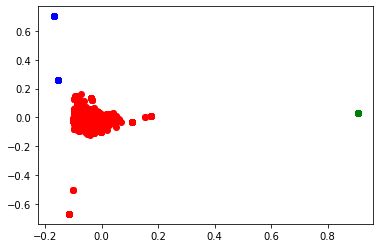

In [ ]:
listlabel=[]
i=0
while i<len(clf.labels_):
    listlabel.append([i,clf.labels_[i]])
    i=i+1

frame = pd.DataFrame(listlabel,columns=['index','class'])


list0=[]                                                
data0=frame[(frame[u'class']==0)].iloc[:,0]
for m in data0:
    list0.append(m)

list1=[]
data1=frame[(frame[u'class']==1)].iloc[:,0]
for m in data1:
    list1.append(m)

list2=[]
data2=frame[(frame[u'class']==2)].iloc[:,0]
for m in data2:
    list2.append(m)



# Dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
newData = pca.fit_transform(weight)


#Class 1
x1=[]          
y1=[]        
for j in list0:
    x1.append(newData[j][0])
    y1.append(newData[j][1])

#Class 2
x2 = []
y2 = []
for j in list1:
    x2.append(newData[j][0])
    y2.append(newData[j][1])

#Class 3
x3 = []
y3 = []
for j in list2:
    x3.append(newData[j][0])
    y3.append(newData[j][1])



#Visualization
plt.plot(x1, y1, 'or')
plt.plot(x2, y2, 'og')
plt.plot(x3, y3, 'ob')

plt.show()

In [ ]:
print(len(frame[frame['class']==0]))
print(len(frame[frame['class']==1]))
print(len(frame[frame['class']==2]))

7182
479
380


In [ ]:
print(frame)

      index  class
0         0      0
1         1      0
2         2      0
3         3      2
4         4      0
...     ...    ...
8036   8036      0
8037   8037      0
8038   8038      0
8039   8039      0
8040   8040      0

[8041 rows x 2 columns]


In [ ]:
frame = frame[['class']]
df

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,chernihiv oblast. ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,2,1235940869812809728,ThanapornThon17,à¹à¸¥à¹à¸à¹à¸§à¹à¸­à¸¥à¸´à¸\nà¸à¸¹à¸à¸...,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,america is preparing for something worse than ...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,"just in anonymous has hacked released 62,000 e...","[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,4,1505394816636846083,Marsh_Win_01,ð¿@Pickaw @TWITTERPICKER ð¿Winning isnât...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,public mint now live for billionaire wmn win ...,[],en,NaN,0,2022-04-01 00:09:37.101459
5,5,799652508771766274,Judson_Bennett,"Coastal Network founder. Advocate, journalist,...",NaN,766,2024,4601,2016-11-18 16:36:29.000000,1509681952000937999,2022-04-01 00:00:00.000000,1,the amazing story of former sussex county dela...,"[{'text': 'Russia', 'indices': [208, 215]}, {'...",en,NaN,0,2022-04-01 00:14:21.490394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,1015273348631232512,Wandacalabrese1,proud boomer survived the 60 twice. Love this ...,"New York, USA",3442,2821,239882,2018-07-06 16:36:43.000000,1509695441490915328,2022-04-01 00:53:36.000000,82,i ll be joining lawrence tonight on thelastwor...,"[{'text': 'Putin', 'indices': [130, 136]}]",en,NaN,0,2022-04-01 01:29:19.293893
9997,9997,47491647,rolvin15,Gerente Seguridad del Negocio,Venezuela,399,115,6467,2009-06-16 00:30:38.000000,1509695441599877125,2022-04-01 00:53:36.000000,388,ukraine russian troops were hit by ukrainian ...,"[{'text': 'Ukraine', 'indices': [15, 23]}]",en,NaN,0,2022-04-01 01:09:32.271796
9998,9998,4680216434,0suzanna10,ðºð¦ðºð¦ðºð¦ðºð¦I STAND withð...,YEG ð¤ð½Amiskawaci-Waskahikan,1210,484,9667,2015-12-30 23:00:54.000000,1509695443793448988,2022-04-01 00:53:37.000000,128,the misery that is now upon us is but the pas...,[],en,NaN,0,2022-04-01 01:29:19.285855
9999,9999,1160113082607296512,BlackCo16122436,"Journalist, blogger. https://t.co/HNypzpYoCm",NaN,1027,602,59135,2019-08-10 08:58:07.000000,1509695445467029507,2022-04-01 00:53:37.000000,0,cnn repgregorymeeks jaketapper . cnn spring a...,"[{'text': 'Ukraine', 'indices': [58, 66]}, {'t...",en,NaN,0,2022-04-01 01:29:19.277817


In [ ]:
frame.to_csv("labels.csv", sep='\t', encoding='utf-8')

#1.1

In [ ]:
## Reading the data and removing columns that are not important. 
df = pd.read_csv('/content/data/processed/labeled_sample_600.csv', sep = ',', encoding = 'latin-1')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,tweetcreatedts,text,value
0,0.0,620503.0,2022-03-16 22:16:46,By sending weapons to Ukraine and cheer-leadin...,0
1,1.0,621695.0,2022-03-16 22:50:54,Here is the other NFT charity drop I'm a part ...,2
2,2.0,615671.0,2022-03-16 19:58:05,The Russian Orthodox Church is alienating Ukra...,0
3,3.0,622314.0,2022-03-16 23:06:47,@MSNBC Ã° War in #Ukraine is a Massive Bonanza...,0
4,4.0,623954.0,2022-03-16 23:51:20,"""We believe in peaceful and non-violent civil ...",2


In [ ]:
import re
from bs4 import BeautifulSoup
from html import unescape
#Remove URLS
def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [ ]:
#Unescape characters
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [ ]:
#Remove emojis
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
#Replace conservative whitespaces
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [ ]:
#Remove unwanted symbols
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string 

In [ ]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(unescape_stuff)
df['text'] = df['text'].apply(deEmojify)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(unify_whitespaces)

In [ ]:
df['text'].head()

0    by sending weapons to ukraine and cheer leadin...
1    here is the other nft charity drop i m a part ...
2    the russian orthodox church is alienating ukra...
3     msnbc war in ukraine is a massive bonanza for...
4     we believe in peaceful and non violent civil ...
Name: text, dtype: object

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

In [ ]:
#Determine the sentiments using polarity of textblob 
accuracy = 0
correct = 0
for i in df.index:
    score = 0
    data = TextBlob(df['text'][i])
    if data.sentiment[0]>0.05:
        score = 2
    elif data.sentiment[0]<-0.05:
        score = 0 
    else:
        score = 1
    print(score,  df['value'][i])
    if  score == df['value'][i]:   
        correct += 1
    else:
        pass

1 0
0 2
1 0
1 0
0 2
1 0
1 0
1 1
1 0
1 1
1 0
2 0
0 0
1 0
2 0
0 0
1 1
2 0
2 0
1 0
1 0
2 0
1 0
2 1
1 2
2 2
2 0
1 2
1 2
2 0
2 0
2 0
2 2
1 0
1 2
1 0
0 0
0 0
1 0
2 2
2 2
2 0
1 0
2 2
0 0
1 1
2 0
1 0
2 0
2 0
2 2
0 0
2 0
2 2
1 0
2 2
1 0
2 2
2 2
1 0
0 0
2 2
0 0
0 0
2 2
2 2
2 0
1 0
2 0
2 0
0 0
0 0
2 0
0 0
1 0
2 2
1 1
2 1
2 0
0 0
0 0
1 0
0 0
1 0
2 2
1 0
2 0
0 0
1 0
2 0
1 0
1 0
2 2
1 2
0 0
2 2
1 0
0 0
2 2
0 2
0 0
1 0
1 0
1 0
0 0
2 0
0 0
2 2
1 2
1 2
1 0
1 0
1 0
1 0
2 0
0 0
2 0
0 2
2 0
1 1
2 2
2 1
2 0
1 1
2 0
0 0
0 0
2 0
2 2
1 2
1 2
0 0
2 0
1 1
1 2
0 1
2 2
1 2
0 0
1 2
2 0
2 2
1 2
2 2
2 0
1 2
0 0
0 0
0 0
2 1
0 0
2 2
2 2
2 2
2 2
0 0
2 0
2 0
1 2
2 2
2 0
2 0
2 0
1 0
2 0
2 0
1 0
1 0
2 2
2 0
2 2
0 2
1 2
2 2
0 1
1 0
2 0
1 2
1 0
0 1
1 0
1 0
2 2
2 0
2 0
1 1
1 1
2 0
1 0
2 0
2 0
1 2
1 2
1 2
2 0
1 0
0 0
2 0
1 0
1 2
0 1
1 1
1 0
2 0
2 0
2 1
2 0
0 1
0 0
1 1
1 1
2 0
2 1
1 2
2 2
2 2
2 1
1 1
1 1
1 1
1 0
2 2
2 0
2 0
2 1
1 1
2 1
0 0
2 1
1 0
2 0
1 0
0 0
1 2
2 0
1 1
2 0
1 1
0 1
2 1
1 2
2 1
1 0
1 1
1 2
1 2
1 1
0 1
0 2
1 1


In [ ]:
accuracy = correct / len(df)
print(accuracy)

0.43166666666666664


#1.2

#Dataset Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

In [ ]:
df = pd.read_csv(r'twitter.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364870,364870,377139026,Angelocsn,"conseiller en droit du travail, aime la musiqu...","rive sud, Montréal",2594,2309,40959,2011-09-21 02:40:07.000000,1510044327510265863,2022-04-01 23:59:57.000000,0,@montreal110 @femeninna je trouve plutôt terri...,"[{'text': 'impuissance', 'indices': [81, 93]},...",fr,NaN,0,2022-04-02 00:13:16.247799
364871,364871,1054170412194553857,TribalHawk1,NaN,East Los Angeles,207,29,9045,2018-10-22 00:39:46.000000,1510044329993138176,2022-04-01 23:59:58.000000,0,“From where Winston stood it was just possible...,"[{'text': 'Ukraine', 'indices': [218, 226]}]",en,NaN,0,2022-04-02 00:13:16.239719
364872,364872,40997579,ljall00,Democrat. This is a country of laws for everyo...,"Scottsdale, AZ",5336,4898,162426,2009-05-18 23:21:35.000000,1510044330085347328,2022-04-01 23:59:58.000000,2264,When I said tonight in front of 3000 people In...,[],en,NaN,0,2022-04-02 00:46:46.527353
364873,364873,376000049,SaverioVivas2,Corresponsal de PDC (@Punto_DeCorte) en Colomb...,Colombia,8218,8789,37666,2011-09-19 03:47:15.000000,1510044333533184005,2022-04-01 23:59:59.000000,0,#1Abr #Ucrania \nVídeo de los helicópteros ucr...,"[{'text': '1Abr', 'indices': [0, 5]}, {'text':...",es,NaN,0,2022-04-02 00:04:42.165753


In [ ]:
df.isnull().sum()

Unnamed: 0             0
userid                 0
username               0
acctdesc           78443
location          151942
following              0
followers              0
totaltweets            0
usercreatedts          0
tweetid                0
tweetcreatedts         0
retweetcount           0
text                   0
hashtags               0
language               0
coordinates       364778
favorite_count         0
extractedts            0
dtype: int64

In [ ]:
lang_count = df['language'].value_counts()

lang_count.index

Index(['en', 'fr', 'de', 'it', 'und', 'es', 'uk', 'ru', 'hi', 'pl', 'ja', 'tr',
       'nl', 'ar', 'pt', 'zh', 'th', 'fi', 'el', 'sv', 'ro', 'in', 'cs', 'lv',
       'ta', 'ko', 'ca', 'ur', 'fa', 'et', 'da', 'no', 'gu', 'sl', 'ht', 'iw',
       'tl', 'bn', 'vi', 'mr', 'lt', 'cy', 'te', 'eu', 'kn', 'bg', 'ml', 'or',
       'sr', 'hu', 'ka', 'pa', 'ckb', 'is', 'my', 'ne', 'am', 'ps', 'si', 'hy',
       'dv'],
      dtype='object')

In [ ]:
lang_count[:10]

en     254626
fr      18647
de      16446
it      15877
und     15613
es      12526
uk       4669
ru       4151
hi       3475
pl       2943
Name: language, dtype: int64

In [ ]:
hashtag_list = []

def get_hashtag(tweet):
    hashtags = re.findall(r"#(\w+)", tweet)
    hashtag_list.extend(hashtags)

In [ ]:
for tweet in df['text']:
    get_hashtag(tweet)

print("total unique hashtags: ", len(hashtag_list))
print(hashtag_list[1:50])

hashtag_set = set(hashtag_list)

total unique hashtags:  1228764
['StopRussia', 'UkraineUnderAttaсk', 'russianinvasion', 'StandWithUkraine', 'UkraineUnderAttack', 'UkraineWillWin', 'PutinIsaWarCriminal', 'StopPutin', 'RussianUkrainianWar', 'RussiaGoHome', 'РоссияСмотри', 'нетвойне', 'RussianUkrainianWar', 'China', 'Taiwan', 'Anonymous', 'OpRussia', 'DDoSecrets', 'nft', 'mint', 'Russia', 'Ukraine', 'motivation', 'netDE', 'eduDE', 'Delaware', 'government', 'USA', 'Ukraine', 'UkraineWar', 'Russia', 'UkraineInvasion', 'Russian', 'Moscow', 'Ukraine', 'Putin', 'Medvedev', 'Russia', 'Ukraine', 'Russia', 'Putin', 'RussianArmy', 'Chernobyl', 'RussianUkrainianWar', 'عينك_على_العالم', 'الحرب_الأوكرانية_الروسية', 'RussianUkrainianWar', 'RussiaUkraineConflict', 'Soviet']


In [ ]:
def hashtag_freq(hashtag_list):
    a = nltk.FreqDist(hashtag_list)
    hash_df = pd.DataFrame({'Hashtag': list(a.keys()), 
                            'Frequency': list(a.values())
                           })
    
    hash_df = hash_df.nlargest(columns='Frequency', n = 25)
    
    return hash_df

In [ ]:
hash_df = hashtag_freq(hashtag_list)

hash_df

,Hashtag,Frequency
21,Ukraine,164552
20,Russia,57514
4,StandWithUkraine,44944
32,Putin,31359
45,Kyiv,19329
129,UkraineRussiaWar,19106
30,Russian,17148
1,StopRussia,17051
110,Mariupol,16106
28,UkraineWar,11893


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = nltk.PorterStemmer()

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', text)
    text = re.sub('\n|\t', '', text)
    text = re.sub('\d', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'^\s*|\s\s*', ' ', text).strip()
    text = re.sub(r'[^a-zA-z.,!?/:;\"\'\s]', "", text)
    text = [word for word in text.split() if word not in stopwords]
    text = [stemmer.stem(word) for word in text]
    
    text = " ".join(text)
    
    return text

In [ ]:
df['clean_tweet'] = df['text'].apply(preprocess)

In [ ]:
avg_tweet_len = df['text'].str.len().mean()
avg_word_count = df['text'].str.split().str.len().mean()

print('Original Tweets: ')
print(int(avg_tweet_len))
print(int(avg_word_count))


avg_clean_tweet_len = df['clean_tweet'].str.len().mean()
avg_clean_word_count = df['clean_tweet'].str.split().str.len().mean()

print('Preprocessed Tweets: ')
print(int(avg_clean_tweet_len))
print(int(avg_clean_word_count))

Original Tweets: 
207
28
Preprocessed Tweets: 
125
18


In [ ]:
from textblob import TextBlob

In [ ]:
#2- postive 1- Neutral 0-negative
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if (analysis.sentiment.polarity > 0):
        return 2
    elif(analysis.sentiment.polarity<0):
        return 0
    else: 
        return 1
        

In [ ]:
df['sentiment'] = df['clean_tweet'].apply(lambda x : sentiment_analysis(x))

In [ ]:
data = df[['clean_tweet', 'sentiment', 'retweetcount', 'favorite_count']]
data1 = df[['clean_tweet', 'sentiment']]
data1

,clean_tweet,sentiment
0,ukrainian air forc would like address misinfor...,1
1,chernihiv oblast ukrainian welcom liber russia...,1
2,america prepar someth wors russianukrainianwar...,2
3,anonym hack amp releas email marathon group ru...,2
4,public mint livefor billionaire_wmnwin public ...,2
...,...,...
364870,montreal femeninna je trouv plutt terribl de n...,1
364871,winston stood possibl read pick white face ele...,1
364872,said tonight front peopl sioux fall south dako...,1
364873,abr ucrania vdeo de lo helicptero ucraniano en...,1


In [ ]:
data.to_csv("pre_process_data4col.csv", encoding='utf-8-sig')

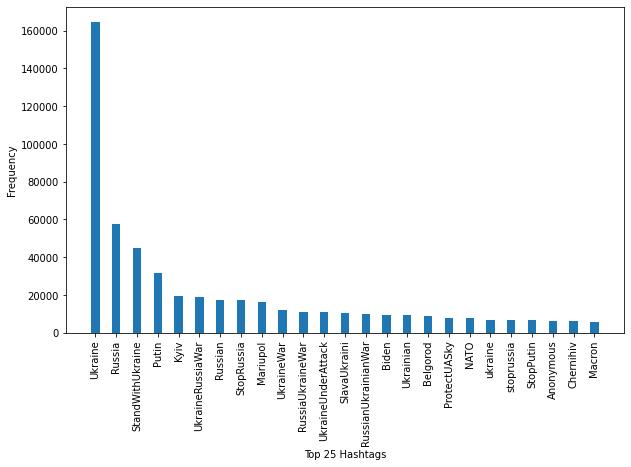

In [ ]:
fig = plt.figure(figsize=(10, 6))

plt.bar(hash_df['Hashtag'], hash_df['Frequency'], width=0.4)

plt.xlabel("Top 25 Hashtags")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [ ]:
text = " ".join(text for text in data['clean_tweet'])

len(text) 

46331464

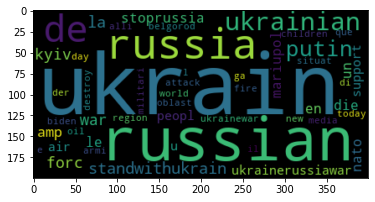

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(max_font_size=100,  max_words = 50,collocations=False).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.show()

In [ ]:
df_neu = data[data['sentiment'] == 1]
df_neu.head()

,clean_tweet,sentiment,retweetcount,favorite_count
0,ukrainian air forc would like address misinfor...,1,3412,0
1,chernihiv oblast ukrainian welcom liber russia...,1,100,0
6,amp quot wait amp quot chernihiv region local ...,1,5,0
8,basic tenet stabil exist world border may chan...,1,3,4
12,____russianukrainianwarrussiaukraineconflict,1,0,7


In [ ]:
neu_text = " ".join(text for text in df_neu['clean_tweet'])

len(neu_text) 

28027872

In [ ]:
wc = WordCloud(max_font_size=100, max_words = 50,collocations=False).generate(pos_text)

plt.imshow(wc, interpolation='bilinear')
plt.show()

NameError: ignored

In [ ]:
df_neg = data[data['sentiment'] == 0]
df_neg.head()

,clean_tweet,sentiment,retweetcount,favorite_count
5,amaz stori former sussex counti delawar counci...,0,1,0
7,india purchas discount russian crude oil put p...,0,2,7
9,imag russia acquir past two decad putin medved...,0,0,0
10,russia presid vladimir putin say sign decre sa...,0,5,9
11,sad read russianarmi invad chernobyl without t...,0,0,0


In [ ]:
neg_text = " ".join(text for text in df_neg['clean_tweet'])

len(neg_text) 

6851118

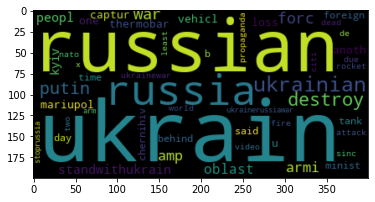

In [ ]:
wc = WordCloud(max_font_size=100, max_words = 50,collocations=False).generate(neg_text)

plt.imshow(wc, interpolation='bilinear')
plt.show()

In [ ]:
df_pos = data[data['sentiment'] == 2]
df_pos.head()

,clean_tweet,sentiment,retweetcount,favorite_count
2,america prepar someth wors russianukrainianwar...,2,9,0
3,anonym hack amp releas email marathon group ru...,2,573,0
4,public mint live billionaire_wmnwin public sal...,2,190,0
16,public mint live billionaire_wmnwin public sal...,2,306,0
22,polic offic kropyvnytskyi ukrain found homeles...,2,117,0


In [ ]:
pos_text = " ".join(text for text in df_pos['clean_tweet'])

len(pos_text) 

11827704

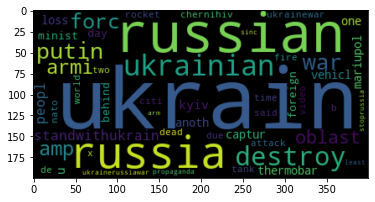

In [ ]:
wc = WordCloud(max_font_size=100, max_words = 50,collocations=False).generate(neg_text)

plt.imshow(wc, interpolation='bilinear')
plt.show()

In [ ]:
print("Total Retweet count for Positive Tweets: ", '{:.2f}'.format(df_pos['retweetcount'].sum()))
print("Total Retweet count for Negative Tweets: ", '{:.2f}'.format(df_neg['retweetcount'].sum()))
print("Total Retweet count for Neutral Tweets: ", '{:.2f}'.format(df_neu['retweetcount'].sum()))

print("Total Like count for Positive Tweets: ", '{:.2f}'.format(df_pos['favorite_count'].sum()))
print("Total Like count for Negative Tweets: ", '{:.2f}'.format(df_neg['favorite_count'].sum()))
print("Total Like count for Neutral Tweets: ", '{:.2f}'.format(df_neu['favorite_count'].sum()))

print("Average Retweet count for Positive Tweets: ", '{:.2f}'.format(df_pos['retweetcount'].mean()))
print("Average Retweet count for Negative Tweets: ", '{:.2f}'.format(df_neg['retweetcount'].mean()))
print("Average Retweet count for Neutral Tweets: ", '{:.2f}'.format(df_neu['retweetcount'].mean()))

print("Average Like count for Positive Tweets: ", '{:.2f}'.format(df_pos['favorite_count'].mean()))
print("Average Like count for Negative Tweets: ", '{:.2f}'.format(df_neg['favorite_count'].mean()))
print("Average Like count for Neutral Tweets: ", '{:.2f}'.format(df_neu['favorite_count'].mean()))

Total Retweet count for Positive Tweets:  43203721.00
Total Retweet count for Negative Tweets:  9012595.00
Total Retweet count for Neutral Tweets:  127026409.00
Total Like count for Positive Tweets:  30097.00
Total Like count for Negative Tweets:  19720.00
Total Like count for Neutral Tweets:  86969.00
Average Retweet count for Positive Tweets:  513.54
Average Retweet count for Negative Tweets:  186.32
Average Retweet count for Neutral Tweets:  546.65
Average Like count for Positive Tweets:  0.36
Average Like count for Negative Tweets:  0.41
Average Like count for Neutral Tweets:  0.37


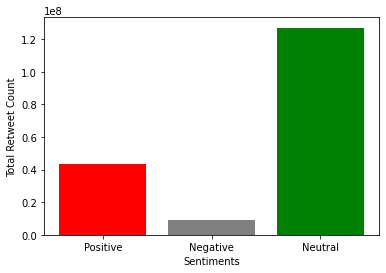

In [ ]:
x = ['Positive', 'Negative','Neutral']
y = [df_pos['retweetcount'].sum(), df_neg['retweetcount'].sum(),df_neu['retweetcount'].sum()]

plt.bar(x, y, color=['red', 'gray', 'green'])
plt.xlabel('Sentiments')
plt.ylabel('Total Retweet Count')
plt.show()

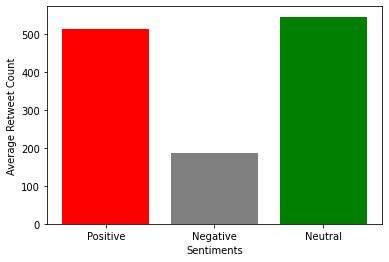

In [ ]:
x = ['Positive', 'Negative', 'Neutral']
y = [df_pos['retweetcount'].mean(), df_neg['retweetcount'].mean(), df_neu['retweetcount'].mean()]

plt.bar(x, y, color=['red', 'gray', 'green'])
plt.xlabel('Sentiments')
plt.ylabel('Average Retweet Count')
plt.show()

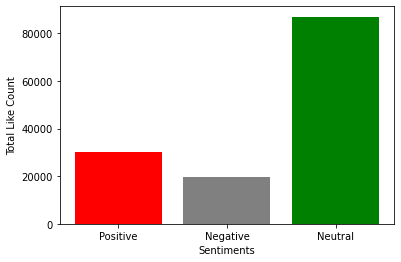

In [ ]:
x = ['Positive', 'Negative', 'Neutral']
y = [df_pos['favorite_count'].sum(), df_neg['favorite_count'].sum(), df_neu['favorite_count'].sum()]

plt.bar(x, y, color=['red', 'gray', 'green'])
plt.xlabel('Sentiments')
plt.ylabel('Total Like Count')
plt.show()

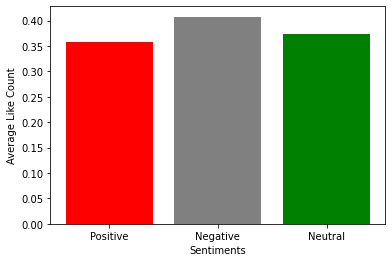

In [ ]:
x = ['Positive', 'Negative', 'Neutral']
y = [df_pos['favorite_count'].mean(), df_neg['favorite_count'].mean(), df_neu['favorite_count'].mean()]

plt.bar(x, y, color=['red', 'gray', 'green'])
plt.xlabel('Sentiments')
plt.ylabel('Average Like Count')
plt.show()

#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features = 50000, stop_words='english')

bow = bow_vectorizer.fit_transform(data['clean_tweet'])

bow.shape

(364875, 50000)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df=2, max_features = 50000, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(data['clean_tweet'])

tfidf.shape

(364875, 50000)

#Dataset splitting

In [ ]:

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(bow, data['sentiment'], test_size = 0.20, random_state = 0)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(tfidf, data['sentiment'], test_size = 0.25, random_state = 0)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(273656, 50000)
(273656,)
(91219, 50000)
(91219,)


#Model Training
Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)

NameError: ignored

In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9479
           1       0.99      1.00      0.99     46710
           2       0.99      0.97      0.98     16786

    accuracy                           0.99     72975
   macro avg       0.99      0.98      0.98     72975
weighted avg       0.99      0.99      0.99     72975



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[10969   713   237]
 [   51 58100   105]
 [  179   959 19906]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     11919
           1       0.97      1.00      0.98     58256
           2       0.98      0.95      0.96     21044

    accuracy                           0.98     91219
   macro avg       0.98      0.95      0.97     91219
weighted avg       0.98      0.98      0.98     91219



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = MultinomialNB()
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[ 8322   320   837]
 [ 4897 34678  7135]
 [ 1091   563 15132]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70      9479
           1       0.98      0.74      0.84     46710
           2       0.65      0.90      0.76     16786

    accuracy                           0.80     72975
   macro avg       0.74      0.84      0.77     72975
weighted avg       0.85      0.80      0.80     72975



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[ 9210   897  1812]
 [ 1383 52546  4327]
 [  510  1323 19211]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     11919
           1       0.96      0.90      0.93     58256
           2       0.76      0.91      0.83     21044

    accuracy                           0.89     91219
   macro avg       0.85      0.86      0.85     91219
weighted avg       0.90      0.89      0.89     91219



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[ 9052   224   203]
 [  128 46423   159]
 [  189   346 16251]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9479
           1       0.99      0.99      0.99     46710
           2       0.98      0.97      0.97     16786

    accuracy                           0.98     72975
   macro avg       0.98      0.97      0.97     72975
weighted avg       0.98      0.98      0.98     72975



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[11265   359   295]
 [  249 57658   349]
 [  244   530 20270]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11919
           1       0.98      0.99      0.99     58256
           2       0.97      0.96      0.97     21044

    accuracy                           0.98     91219
   macro avg       0.97      0.97      0.97     91219
weighted avg       0.98      0.98      0.98     91219



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[69940   235]
 [ 1352 19692]]


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70175
           1       0.99      0.94      0.96     21044

    accuracy                           0.98     91219
   macro avg       0.98      0.97      0.98     91219
weighted avg       0.98      0.98      0.98     91219



In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cm = confusion_matrix(y2_test, y2_pred)
print(cm)

[[69947   228]
 [ 1462 19582]]


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70175
           1       0.99      0.93      0.96     21044

    accuracy                           0.98     91219
   macro avg       0.98      0.96      0.97     91219
weighted avg       0.98      0.98      0.98     91219



In [ ]:
data.to_csv("pre_process_data_col4n3.csv", sep='\t', encoding='utf-8')

# Pre Process

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('pre_process_data2col.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data

,Unnamed: 0,clean_tweet,sentiment
0,0,ukrainian air forc would like address misinfor...,1.0
1,1,chernihiv oblast ukrainian welcom liber russia...,1.0
2,2,america prepar someth wors russianukrainianwar...,2.0
3,3,anonym hack amp releas email marathon group ru...,2.0
4,4,public mint livefor billionaire_wmnwin public ...,2.0
...,...,...,...
184883,184883,video social media allegedli eastern ukrain sh...,2.0
184884,184884,ist es klar dass die zahlungen fr ga mit ber d...,1.0
184885,184885,el decreto firmado por putin faculta gazprom c...,1.0
184886,184886,putin biden chhattisgarh riteshmishraht thealo...,1.0


In [ ]:
data.sentiment.unique()

array([ 1.,  2.,  0., nan])

In [ ]:
data.isna().sum()

Unnamed: 0     0
clean_tweet    0
sentiment      1
dtype: int64

In [ ]:
data[data['sentiment'].isna()]

,Unnamed: 0,clean_tweet,sentiment
184887,184887,v n karazin kharkiv nation univers total destr...,NaN


In [ ]:
data.drop(data[data['sentiment'].isna()].index, inplace=True)

In [ ]:
sentiment_map={0:'negative',2:'positive',1:'neutral'}
data.insert(2,'sentiment1',[sentiment_map[s] for s in data.sentiment],True)

In [ ]:
data

,Unnamed: 0,clean_tweet,sentiment1,sentiment
0,0,ukrainian air forc would like address misinfor...,neutral,1.0
1,1,chernihiv oblast ukrainian welcom liber russia...,neutral,1.0
2,2,america prepar someth wors russianukrainianwar...,positive,2.0
3,3,anonym hack amp releas email marathon group ru...,positive,2.0
4,4,public mint livefor billionaire_wmnwin public ...,positive,2.0
...,...,...,...,...
184882,184882,western spi agenc weapon intellig attempt unde...,negative,0.0
184883,184883,video social media allegedli eastern ukrain sh...,positive,2.0
184884,184884,ist es klar dass die zahlungen fr ga mit ber d...,neutral,1.0
184885,184885,el decreto firmado por putin faculta gazprom c...,neutral,1.0


In [ ]:
#labeling
reviews = np.array(data['clean_tweet'])[:]
labels = np.array(data['sentiment1'])[:]

In [ ]:
from collections import Counter

Counter(labels)

Counter({'neutral': 120869, 'positive': 42274, 'negative': 21744})

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import csv


def preProcessor(Tweet):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', Tweet)
    text=re.sub(r'['+punctuation+']',' ',Tweet)
    text=re.sub(r'#(\w+)',' ',Tweet)
    text=re.sub(r'@(\w+)',' ',Tweet)
    #print(token.tokenize(text))
    return Tweet

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
#text_counts=cv.fit_transform(data['Tweet'])
text_counts=cv.fit_transform(data['clean_tweet'].values.astype('U'))

In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment1'],test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment1'],test_size=0.2)

#Naive Bayes

In [ ]:
#Ber_NB
from sklearn.naive_bayes import *
from sklearn import metrics

clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print('Acurracy = ' ,metrics.accuracy_score(y_test, pred))

Acurracy =  0.8714911569041052


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.74      0.80      0.77      4302
     neutral       0.97      0.87      0.92     24255
    positive       0.73      0.92      0.81      8421

    accuracy                           0.87     36978
   macro avg       0.81      0.86      0.83     36978
weighted avg       0.89      0.87      0.88     36978



#SVM

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print('Acurracy = ' ,metrics.accuracy_score(y_test, pred))

Acurracy =  0.9860187138298447


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y_test, pred))

Acurracy =  0.9860187138298447


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.98      0.96      0.97      4298
     neutral       0.99      0.99      0.99     24345
    positive       0.98      0.97      0.98      8335

    accuracy                           0.99     36978
   macro avg       0.98      0.98      0.98     36978
weighted avg       0.99      0.99      0.99     36978



In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion matrix, without normalization
[[ 4141    95    62]
 [   54 24209    82]
 [   50   168  8117]]
Normalized confusion matrix
[[0.96 0.02 0.01]
 [0.   0.99 0.  ]
 [0.01 0.02 0.97]]


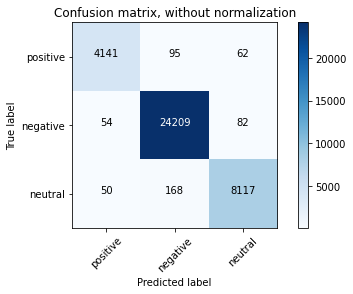

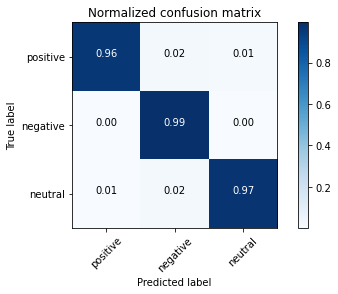

Confusion matrix, without normalization
[[ 4141    95    62]
 [   54 24209    82]
 [   50   168  8117]]
Normalized confusion matrix
[[0.96 0.02 0.01]
 [0.   0.99 0.  ]
 [0.01 0.02 0.97]]


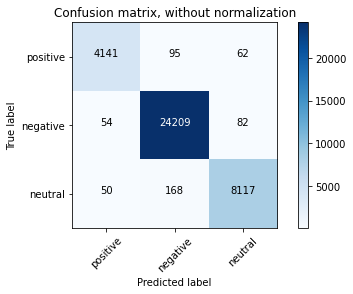

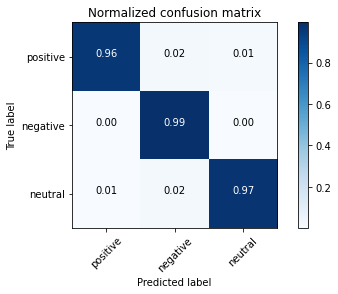

In [ ]:
#linear
from sklearn.svm import LinearSVC
import sklearn
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)
metrics.accuracy_score(y_test, pred)
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

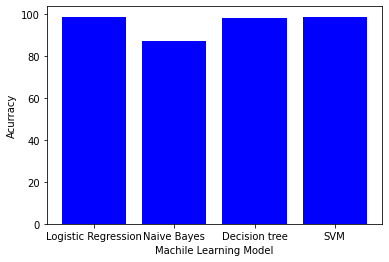

In [ ]:
x = ['Logistic Regression', 'Naive Bayes', 'Decision tree', 'SVM']
y = [98.3,87.1,98.2,98.6]

plt.bar(x, y, color=['blue', 'blue', 'blue', 'blue'])
plt.xlabel('Machile Learning Model')
plt.ylabel('Acurracy')
plt.show()

#Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(text_counts,data['sentiment1'],test_size=0.2)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(147909, 106889)
(147909,)
(36978, 106889)
(36978,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 4161   169    80]
 [   37 24051    40]
 [   76   194  8170]]


In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

Acurracy =  0.9838823083995889


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

    negative       0.97      0.94      0.96      4410
     neutral       0.99      1.00      0.99     24128
    positive       0.99      0.97      0.98      8440

    accuracy                           0.98     36978
   macro avg       0.98      0.97      0.98     36978
weighted avg       0.98      0.98      0.98     36978



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = MultinomialNB()
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[1927   79  191]
 [ 997 9545 1502]
 [ 219  138 3891]]


In [ ]:
metrics.accuracy_score(y1_test, y1_pred)

0.8309264968359565

In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

    negative       0.62      0.86      0.72      4400
     neutral       0.98      0.80      0.88     24246
    positive       0.69      0.92      0.79      8332

    accuracy                           0.83     36978
   macro avg       0.76      0.86      0.80     36978
weighted avg       0.87      0.83      0.84     36978



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[ 4146   139   125]
 [   60 23997    71]
 [  100   156  8184]]


In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

Acurracy =  0.9823949375304235


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

    negative       0.96      0.94      0.95      4410
     neutral       0.99      0.99      0.99     24128
    positive       0.98      0.97      0.97      8440

    accuracy                           0.98     36978
   macro avg       0.98      0.97      0.97     36978
weighted avg       0.98      0.98      0.98     36978



In [ ]:
data.to_csv("pre_process_data4col.csv", encoding='utf-8-sig')